In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("house_data_complete.csv")
training_data = pd.read_csv("house_prices_data_training_data.csv")

In [29]:
#print(type(data))
training_data = data[0:15000]
validation_data = data[15000:20000]
testing_data = data[20000:]

Text(0.5, 0, 'Number of bedrooms')

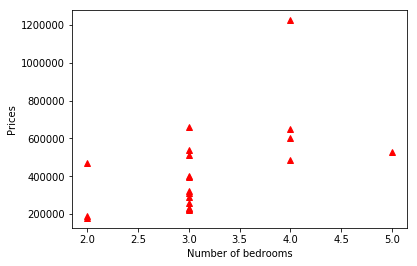

In [30]:
plt.plot(np.array(training_data["bedrooms"])[0:20],np.array(training_data["price"])[0:20],'r^')
plt.ylabel('Prices')
plt.xlabel('Number of bedrooms')

In [31]:
#print(training_data)

In [32]:
#print(testing_data)

In [33]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    for i in range(X.shape[1]):
        mu[i] = np.mean(X[:,i])
        sigma[i] = np.std(X[:,i])
        X_norm[:,i] = (X[:,i]-mu[i])/sigma[i]
    return X_norm, mu, sigma

In [34]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = (1/(2*m))*np.dot(np.transpose(np.dot(X,theta)-y),np.dot(X,theta)-y)
    return J

In [35]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = [] 
    for i in range(num_iters):
        alphabym=alpha/m
        sumofh0x=np.dot(X,theta)
        theta=theta-((alpha/m)*(np.dot(X.T,sumofh0x-y)))
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

In [36]:
X = np.array(training_data[["grade","bedrooms","bathrooms","floors"]])
y = np.array(training_data["price"])

In [37]:
X_norm, mu, sigma = featureNormalize(X)
print(X.shape[1])
print('Computed mean:', mu)
print('Computed standard deviation:', sigma)
print(X_norm)

4
Computed mean: [7.59126667 3.35926667 2.05921667 1.43253333]
Computed standard deviation: [1.16582034 0.90887887 0.75886267 0.5100473 ]
[[-0.50716791 -0.39528553 -1.39579493 -0.84802592]
 [-0.50716791 -0.39528553  0.25140693  1.11257655]
 [-1.36493301 -1.49554216 -1.39579493 -0.84802592]
 ...
 [ 1.20836229  0.7049711   1.23972804  1.11257655]
 [-0.50716791 -0.39528553 -0.73691419 -0.84802592]
 [-0.50716791 -1.49554216 -1.39579493 -0.84802592]]


In [38]:
X = np.concatenate([np.ones((X.shape[0], 1)), X_norm], axis=1)
print(X)

[[ 1.         -0.50716791 -0.39528553 -1.39579493 -0.84802592]
 [ 1.         -0.50716791 -0.39528553  0.25140693  1.11257655]
 [ 1.         -1.36493301 -1.49554216 -1.39579493 -0.84802592]
 ...
 [ 1.          1.20836229  0.7049711   1.23972804  1.11257655]
 [ 1.         -0.50716791 -0.39528553 -0.73691419 -0.84802592]
 [ 1.         -0.50716791 -1.49554216 -1.39579493 -0.84802592]]


In [39]:
print(X)
print(y.shape)

[[ 1.         -0.50716791 -0.39528553 -1.39579493 -0.84802592]
 [ 1.         -0.50716791 -0.39528553  0.25140693  1.11257655]
 [ 1.         -1.36493301 -1.49554216 -1.39579493 -0.84802592]
 ...
 [ 1.          1.20836229  0.7049711   1.23972804  1.11257655]
 [ 1.         -0.50716791 -0.39528553 -0.73691419 -0.84802592]
 [ 1.         -0.50716791 -1.49554216 -1.39579493 -0.84802592]]
(15000,)


In [40]:
alpha = 0.01
num_iters = 400
theta = np.zeros(5)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(J_history)

[204897398871.63733, 201016015975.5367, 197239877334.23386, 193565535570.75348, 189989676261.13596, 186509112238.02695, 183120778152.14917, 179821725279.67813, 176609116564.10767, 173480221881.72546, 170432413520.3311, 167463161861.31448, 164570031255.67764, 161750676085.0227, 159002836998.95227, 156324337320.72748, 153713079613.41168, 151167042399.09412, 148684277024.13, 146262904663.67023, 143901113459.06366, 141597155782.0184, 139349345619.69345, 137156056075.16434, 135015716977.96701, 132926812599.67102, 130887879469.66904, 128897504286.59488, 126954321920.99579, 125057013505.0892, 123204304605.62897, 121394963476.09018, 119627799384.55989, 117901661013.8883, 116215434930.81552, 114568044120.94191, 112958446586.55627, 111385634004.4738, 109848630441.16904, 108346491122.61433, 106878301256.35555, 105443174903.46971, 104040253898.16011, 102668706812.84734, 101327727966.7135, 100016536475.75317, 98734375342.47215, 97480510583.46371, 96254230393.1708, 95054844342.22343, 93881682608.813

In [41]:
X_testing = np.array(testing_data[["grade","bedrooms","bathrooms","floors"]])
y_testing = np.array(testing_data["price"])

In [42]:
X_norm_testing, mu_testing, sigma_testing = featureNormalize(X_testing)
X_testing = np.concatenate([np.ones((X.shape[0], 1)), X_norm], axis=1)
print(X_testing)

[[ 1.         -0.50716791 -0.39528553 -1.39579493 -0.84802592]
 [ 1.         -0.50716791 -0.39528553  0.25140693  1.11257655]
 [ 1.         -1.36493301 -1.49554216 -1.39579493 -0.84802592]
 ...
 [ 1.          1.20836229  0.7049711   1.23972804  1.11257655]
 [ 1.         -0.50716791 -0.39528553 -0.73691419 -0.84802592]
 [ 1.         -0.50716791 -1.49554216 -1.39579493 -0.84802592]]


In [43]:
y_predicted = np.dot(X_testing,theta)

In [44]:
print(y_predicted)
print(y_testing)

[337558.40871655 420799.44048144 161834.09873242 ... 828783.2514983
 384406.31139695 323821.74574454]
[445000. 605000. 475000. ... 402101. 400000. 325000.]


Text(0, 0.5, 'Error')

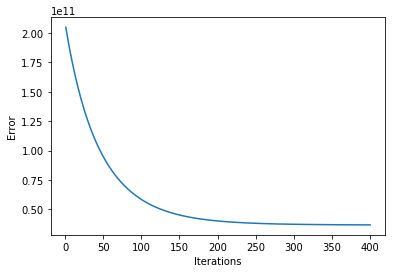

In [45]:
number_of_iterations = np.arange(num_iters) + 1
plt.plot(number_of_iterations,J_history)
plt.xlabel('Iterations')
plt.ylabel('Error')